In [1]:
import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

%matplotlib inline

In [2]:
df=pd.read_csv('abcnews.csv')

In [3]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [17]:
text=df['headline_text'].values

In [18]:
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm") 

In [10]:
my_stop_words = [u'say', u'mr', u'be', u'said', u'says', u'saying', 'today']# stopwords
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [19]:
def preprocess(text):
    doc=nlp(text.lower())
    return [w.lemma_ for w in doc if not w.like_num and not w.is_stop and not w.is_punct]

In [20]:
preprocessed_text=[]
for item in text:
    preprocessed_text.append(preprocess(item))

In [24]:
preprocessed_text[:3]

[['aba', 'decide', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witness', 'aware', 'defamation'],
 ['g', 'call', 'infrastructure', 'protection', 'summit']]

In [25]:
bigram = gensim.models.Phrases(preprocessed_text)
final_text = [bigram[sentence] for sentence in preprocessed_text]

In [26]:
final_text[:3]

[['aba', 'decide', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witness', 'aware', 'defamation'],
 ['g', 'call', 'infrastructure', 'protection', 'summit']]

In [27]:
dictionary = Dictionary(final_text)
corpus = [dictionary.doc2bow(sentence) for sentence in final_text]

In [28]:
corpus[:3]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]

In [29]:
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [31]:
corpus_tfidf[0]

[(0, 0.486660103733679),
 (1, 0.5659584505936369),
 (2, 0.3385872094734546),
 (3, 0.3929695434605654),
 (4, 0.41687721828968843)]

In [32]:
from gensim.models import HdpModel
hdpmodel = HdpModel(corpus=corpus_tfidf, id2word=dictionary)

In [33]:
hdpmodel.show_topics()

[(0,
  '0.000*fire + 0.000*plan + 0.000*police + 0.000*council + 0.000*wimmera + 0.000*govt + 0.000*new + 0.000*green_zone + 0.000*dependent + 0.000*arts_festival + 0.000*raunchy + 0.000*bus + 0.000*shellharbour + 0.000*scarboroughs + 0.000*raze + 0.000*warn + 0.000*switch + 0.000*pretext + 0.000*sydney + 0.000*bankruptcy'),
 (1,
  '0.000*flatulence + 0.000*police + 0.000*bud + 0.000*new + 0.000*narooma + 0.000*plan + 0.000*cut + 0.000*port + 0.000*farmer_urge + 0.000*council + 0.000*claim + 0.000*jobsearch + 0.000*boost + 0.000*death + 0.000*latif + 0.000*seek + 0.000*atlas + 0.000*rail_standardisation + 0.000*iraq + 0.000*riis'),
 (2,
  '0.000*police + 0.000*bethlehem + 0.000*govt + 0.000*new + 0.000*plan + 0.000*werewolf + 0.000*win + 0.000*council + 0.000*union + 0.000*man + 0.000*say + 0.000*anglicare + 0.000*moscow + 0.000*ghana + 0.000*cap + 0.000*universe + 0.000*capacity + 0.000*involve + 0.000*fertility + 0.000*flourish'),
 (3,
  '0.001*critical_condition + 0.000*new + 0.000*

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,minimum_probability=0)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [35]:
from gensim.models.coherencemodel import CoherenceModel

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=final_text, limit=30, start=2, step=3)




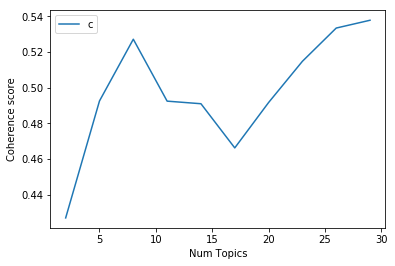

In [36]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [37]:
#Using a LDA model of 30 topics as per the coherenece value
ldamodel_tuned = LdaModel(corpus=corpus_tfidf, num_topics=30, id2word=dictionary, minimum_probability=0)

In [52]:
ldamodel_tuned.show_topics(30) #showing all 30 topics

[(0,
  '0.143*"new" + 0.124*"report" + 0.081*"concern" + 0.063*"england" + 0.061*"health" + 0.059*"work" + 0.047*"big" + 0.044*"air" + 0.022*"airport" + 0.016*"order"'),
 (1,
  '0.136*"death" + 0.092*"jail" + 0.086*"community" + 0.067*"baby" + 0.056*"driver" + 0.042*"use" + 0.022*"transfer" + 0.021*"waste" + 0.008*"flock" + 0.007*"road_rage"'),
 (2,
  '0.102*"back" + 0.094*"defend" + 0.091*"rule" + 0.067*"year" + 0.048*"make" + 0.041*"raid" + 0.028*"brack" + 0.022*"legal" + 0.020*"crop" + 0.020*"wheat"'),
 (3,
  '0.073*"wa" + 0.055*"reject" + 0.054*"begin" + 0.053*"expect" + 0.042*"increase" + 0.039*"clear" + 0.037*"land" + 0.035*"athens" + 0.031*"risk" + 0.029*"president"'),
 (4,
  '0.086*"court" + 0.053*"open" + 0.051*"record" + 0.047*"review" + 0.041*"lose" + 0.039*"ahead" + 0.039*"national" + 0.039*"vote" + 0.038*"sa" + 0.034*"bid"'),
 (5,
  '0.116*"iraq" + 0.097*"claim" + 0.064*"want" + 0.041*"teacher" + 0.041*"remain" + 0.031*"whale" + 0.028*"housing" + 0.027*"hill" + 0.026*"star

In [53]:
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel_tuned.show_topics(formatted=False)]

hdp_coherence = CoherenceModel(topics=hdptopics, texts=final_text, dictionary=dictionary,coherence='c_v').get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=final_text, dictionary=dictionary, coherence='c_v').get_coherence()

In [54]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

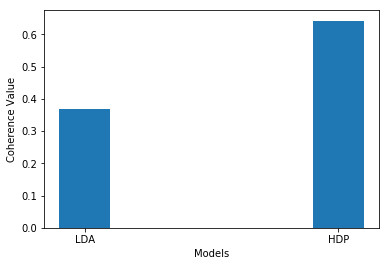

In [55]:
evaluate_bar_graph([lda_coherence, hdp_coherence],
                   ['LDA', 'HDP'])

In [62]:
#Naming the topics for LDA
import re
def naming_topics(sentence):
    regex = re.compile('[^a-zA-Z]')
    sent=regex.sub(' ', sentence)
    pattern = re.compile(r'\s+') 
    output=re.sub(pattern, ' ', sent)
    name="_".join(output.strip().split(" ")[:5])
    return name

In [63]:
topic_names={}
for i in range(len(ldamodel_tuned.show_topics(30))):
    topic_names['Topic_'+str(i)]=naming_topics(ldamodel_tuned.show_topics(30)[i][1])

In [64]:
topic_names

{'Topic_0': 'new_report_concern_england_health',
 'Topic_1': 'death_jail_community_baby_driver',
 'Topic_2': 'back_defend_rule_year_make',
 'Topic_3': 'wa_reject_begin_expect_increase',
 'Topic_4': 'court_open_record_review_lose',
 'Topic_5': 'iraq_claim_want_teacher_remain',
 'Topic_6': 'plan_govt_support_protest_union',
 'Topic_7': 'water_sydney_accuse_cut_cost',
 'Topic_8': 'say_fire_iraqi_rise_force',
 'Topic_9': 'win_change_help_indigenous_security',
 'Topic_10': 'target_hope_miss_push_vic',
 'Topic_11': 'head_inquiry_meet_focus_day',
 'Topic_12': 'pm_ban_end_deny_meeting',
 'Topic_13': 'drug_home_m_service_dead',
 'Topic_14': 'hold_road_safety_lift_city',
 'Topic_15': 'seek_warn_group_mp_troop',
 'Topic_16': 'call_test_delay_tourism_award',
 'Topic_17': 'lead_continue_australia_final_adelaide',
 'Topic_18': 'minister_set_fear_strike_appeal',
 'Topic_19': 'police_charge_probe_case_name',
 'Topic_20': 'attack_find_woman_return_murder',
 'Topic_21': 'law_howard_family_look_regional'

In [66]:
lda_corpus = ldamodel_tuned[corpus_tfidf]

In [67]:
from itertools import chain
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)

In [69]:
# Create clusters corresponding to each topic
clusters={}
for seq in range(len(ldamodel_tuned.show_topics(30))): 
    clusters['Cluster_'+str(seq)] = [j for i,j in zip(lda_corpus,final_text) if i[seq][1] > threshold]

In [75]:
clusters['Cluster_0'] # All sentences corresponding to Topic_0

[['big', 'hope', 'launceston', 'cycling', 'championship'],
 ['big', 'plan', 'boost', 'paroo', 'water_supply'],
 ['brigadier', 'dismiss', 'report', 'troop', 'harass'],
 ['code_conduct', 'toughen', 'organ_donation', 'regulation'],
 ['councillor', 'contest', 'wollongong', 'independent'],
 ['dispute', 'smithton', 'vegetable', 'processing', 'plant'],
 ['england', 'change', 'wales', 'match'],
 ['epa', 'try', 'recover', 'chemical', 'clean', 'cost'],
 ['firefighter_contain', 'acid', 'spill'],
 ['fund', 'announce', 'bridge', 'work'],
 ['golf_club', 'feel', 'smoking_ban', 'impact'],
 ['hacker', 'gain', 'access', 'credit_card'],
 ['jury_consider', 'verdict', 'murder_case'],
 ['juvenile', 'sex_offender', 'unlikely', 'reoffend'],
 ['minute', 'hand', 'alinghi', 'big', 'lead'],
 ['mp', 'raise', 'hospital', 'concern', 'parliament'],
 ['effect', 'new', 'whooping_cough', 'vaccine'],
 ['nsw_opp', 'pledge_m', 'drought_relief'],
 ['patterson', 'defend_decision', 'attend', 'health'],
 ['patterson', 'snubs',

In [76]:
#Defining a join function to detokenize the sentence to strings
def Join(array_of_tokenized_sentence):
    return " ".join(array_of_tokenized_sentence)

In [96]:
def list_of_dataframes(num_topics):
    df_array=[]
    for i in range(num_topics):
        headlines=[Join(w) for w in clusters['Cluster_'+str(i)]]
        df_array.append(pd.DataFrame({'Topic_No':'Topic_'+str(i),'Topics':topic_names['Topic_'+str(i)],'News_Headlines':headlines}))
    return df_array

In [97]:
result_df=pd.concat(list_of_dataframes(30))

In [98]:
result_df.sample(15)

,Topic_No,Topics,News_Headlines
17206,Topic_28,hit_act_leave_die_tour,origin blow barrett thompson
12596,Topic_12,pm_ban_end_deny_meeting,asa chairman resign
15506,Topic_23,hospital_qld_fight_british_victim,mother will_not goodbye singh anniversary
15554,Topic_3,wa_reject_begin_expect_increase,canadian lottery winner flee ex wife
13079,Topic_11,head_inquiry_meet_focus_day,chickenpox put ferrero indian_well
5924,Topic_17,lead_continue_australia_final_adelaide,fta dominate music industry conference
6376,Topic_9,win_change_help_indigenous_security,downer head vietnam diplomatic milestone
9910,Topic_7,water_sydney_accuse_cut_cost,thousand tip christmas parade
15164,Topic_5,iraq_claim_want_teacher_remain,country brink
2664,Topic_0,new_report_concern_england_health,man_charge townsville shooting


In [99]:
result_df.to_csv('Output_TopicModel_ABC_News.csv', index=False)